In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.offline as pyoff
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


billet = pd.read_csv('billets.csv', sep =';')

## Vérification des données

In [2]:
billet.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [3]:
billet['is_genuine'].unique()

array([ True, False])

In [4]:
billet.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [5]:
billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


## Certaines valeurs manquantes sur la colonnes 'margin_low'

In [6]:
# Detection de tout les NaN
column_with_nan = billet.columns[billet.isnull().any()]
billet.shape
# boucle 
for column in column_with_nan:
    print(column, billet[column].isnull().sum())


margin_low 37


## Création d'un DF avec seulement les valeurs manquantes

In [7]:
billet_NaN = billet[billet.isna().any(axis=1)]
len(billet_NaN)
billet_NaN.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72         True    171.94       103.89        103.45         NaN       3.25   
99         True    171.93       104.07        104.18         NaN       3.14   
151        True    172.07       103.80        104.38         NaN       3.02   
197        True    171.45       103.66        103.80         NaN       3.62   
241        True    171.83       104.14        104.06         NaN       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

In [8]:
billet_Ok = billet.dropna()
display(billet_Ok)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1463 rows x 7 columns]

## Imputation des valeurs manquantes par régression linéaire

In [9]:
lr = LinearRegression(normalize=True)

billet_NaN = billet[billet['margin_low'].isnull()==True]
billet_Ok = billet[billet['margin_low'].isnull()==False]
y = billet_Ok['margin_low']
x = billet_Ok.drop("margin_low",axis=1)
lr.fit(x,y)
billet_NaN.drop("margin_low",axis=1,inplace=True)
pred = lr.predict(billet_NaN)
billet_NaN['margin_low'] = pred

In [10]:
print('le R² est de :', lr.score(x,y), 'avec l\'algorithme SkLearn')

le R² est de : 0.6168760755671029 avec l'algorithme SkLearn


Pour comprendre le résultat, plus le résultat tant vers 0 plus le nuage de points est dispersé autour de la droite, a l'inverse, plus le résultat est proche de 1 plus le nuage de points se ressert sur la droite.

Le r² ou coefficient de détermination est une mesure de la qualité de la prédiction linéaire, ici d'environ 62%, qui pour info n'est pas de bonne qualité, puisque l'on recherche plus de 90%.

## Affichage du coefficient

In [11]:
reg = smf.ols('margin_low ~ is_genuine+diagonal+height_left+height_right+margin_up+length', data=billet_Ok)
res = reg.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          4.75e-299
Time:                        14:36:02   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

coef : margin_low =  diagonal*-0.013(coef)+height_left*0.0283....+b (intercept) => modelisation de margin_low, permet de trouver margin_low par rapport aux autres variables

P>|t| : La sortie de régression ci-dessus montre que les variables prédictives is_genuine et margin_up sont statistiquement significatives car leurs valeurs p sont égales à 0,000. D'un autre côté, les autres variables ne sont pas statistiquement significatives car leurs valeurs p sont supérieures au niveau de signification habituel de 0,05. 

## normalité des residus

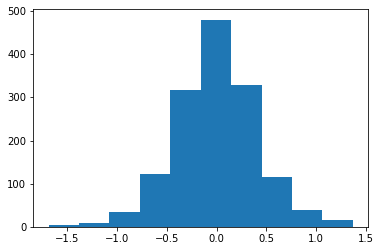

In [12]:
residu = lr.predict(x) - y
plt.hist(residu)
plt.show()  ## modele lineaire non faussé car suit une loi normale

## Colinéarité


VIF (Variance Inflation Factor) signifie Facteur d'Inflation de la Variance. Au cours de l'analyse de régression, VIF évalue si les facteurs sont corrélés les uns aux autres (multi-colinéarité), ce qui pourrait influencer les autres facteurs et réduire la fiabilité du modèle.Si un VIF est supérieur à 10, vous avez une multi-colinéarité élevée : la variation semblera plus grande et le facteur apparaîtra plus influent qu'il ne l'est. Si VIF est plus proche de 1, alors le modèle est beaucoup plus robuste, car les facteurs ne sont pas influencés par la corrélation avec d'autres facteurs.

In [13]:

X_variables = billet_Ok[['diagonal', 'height_left', 'height_right', 'margin_up', 'margin_low', 'length']]

vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i)
for i in range(len(X_variables.columns))]
vif_data

feature            VIF
0      diagonal  170808.246898
1   height_left  114373.426488
2  height_right  105157.499668
3     margin_up     264.908266
4    margin_low      89.003990
5        length   31205.638468

Pour qu'un VIF soit acceptable, nous avons la formule : VIF < MAX(10,1/1-R²)

Donc, le VIF doit être compris entre 10 et 2.56, ce qui n'est pas du tout notre cas

confirmation que le modele de reg lineaire n'est vraiment pas de bonne qualité

In [14]:
billet = pd.concat([billet_NaN, billet_Ok], axis=0)
billet

is_genuine  diagonal  height_left  height_right  margin_up  length  \
72          True    171.94       103.89        103.45       3.25  112.79   
99          True    171.93       104.07        104.18       3.14  113.08   
151         True    172.07       103.80        104.38       3.02  112.93   
197         True    171.45       103.66        103.80       3.62  113.27   
241         True    171.83       104.14        104.06       3.02  112.36   
...          ...       ...          ...           ...        ...     ...   
1495       False    171.75       104.38        104.17       3.09  111.28   
1496       False    172.19       104.63        104.44       3.37  110.97   
1497       False    171.80       104.01        104.12       3.36  111.95   
1498       False    172.06       104.28        104.06       3.46  112.25   
1499       False    171.47       104.15        103.82       3.37  112.07   

      margin_low  
72      4.064954  
99      4.111990  
151     4.134003  
197     3.993571  
241     4.140399  
...          ...  
1495    4.420000  
1496    5.270000  
1497    5.510000  
1498    5.170000  
1499    4.630000  

[1500 rows x 7 columns]

In [15]:
billet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 72 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_up     1500 non-null   float64
 5   length        1500 non-null   float64
 6   margin_low    1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


## Pairplot

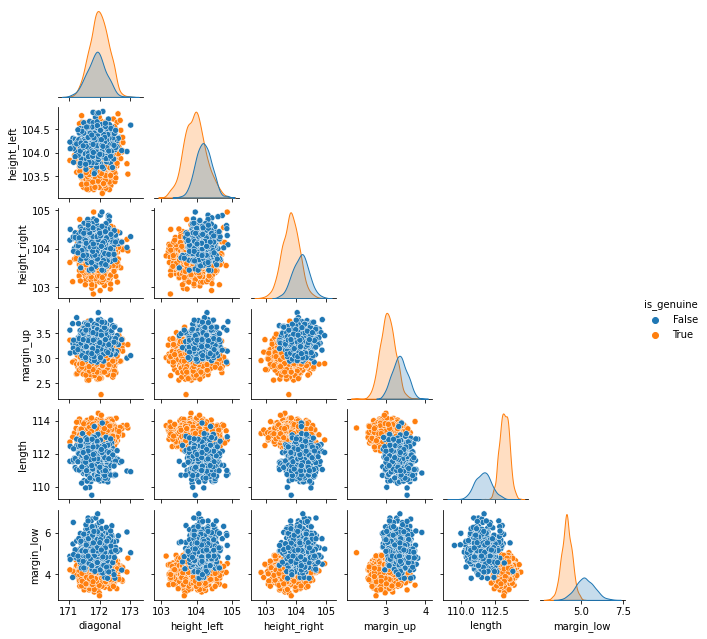

In [16]:
ax = sns.pairplot(billet, hue='is_genuine', corner=True, height=1.5)
plt.show()

On peut remarquer que les vrais billets ont tendance à être plus long que les faux, par contre les faux billets auraient une marge plus grande.

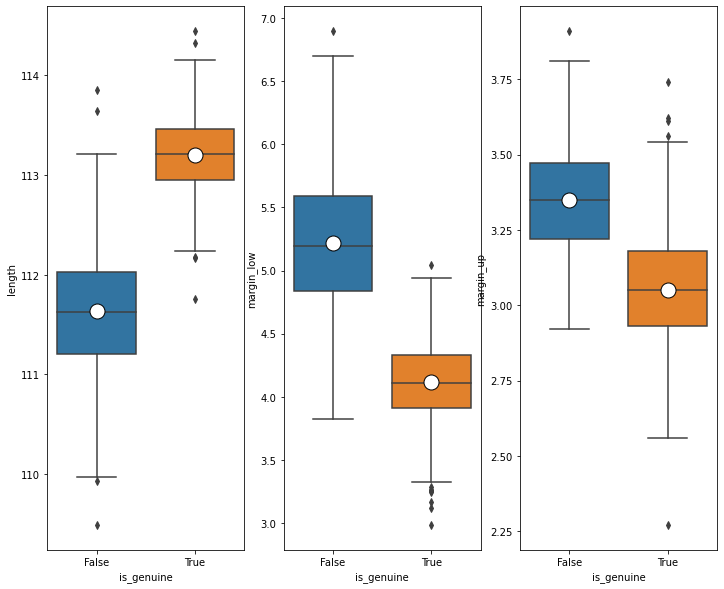

In [17]:
fig, ax = plt.subplots(1,3, figsize=(12,10))
meanprops = {"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"15"}
sns.boxplot(data=billet, y='length', x='is_genuine', showmeans=True, meanprops=meanprops, ax=ax[0])
sns.boxplot(data=billet, y='margin_low', x='is_genuine', showmeans=True, meanprops=meanprops, ax=ax[1])
sns.boxplot(data=billet, y='margin_up', x='is_genuine', showmeans=True, meanprops=meanprops, ax=ax[2])
plt.show()

Cela confirme les différences entre la longueur et les marges des vrais et faux billets. les marges basses ont un écart plus important

## ACP

In [18]:
billetValues = billet.drop(columns =['is_genuine'])
X = billetValues.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [19]:
Mypca = decomposition.PCA(n_components=2)
Mypca.fit(X_scaled)

PCA(n_components=2)

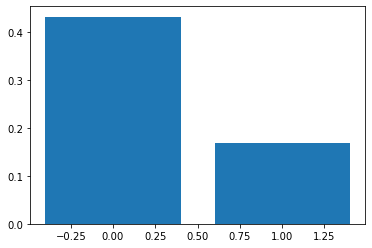

In [20]:
plt.bar(range(len(Mypca.explained_variance_ratio_)),Mypca.explained_variance_ratio_)
plt.show()

<Figure size 720x576 with 0 Axes>

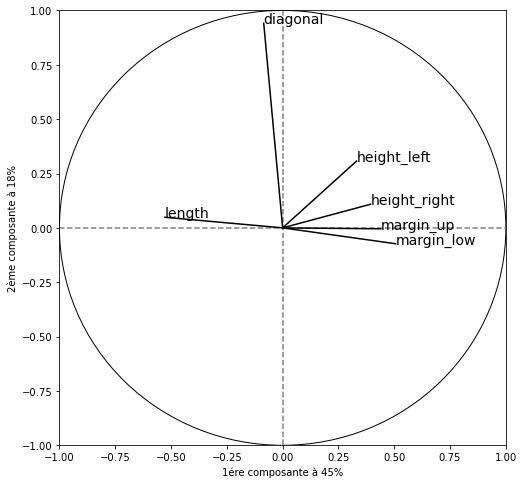

In [21]:
# projeter X sur les composantes principales
X_projected = Mypca.transform(X_scaled)

# afficher chaque observation
plt.figure(figsize=(10,8))

fig =  px.scatter(x=X_projected[:, 0], y=X_projected[:, 1],
    # colorer en utilisant la variable 'is_genuine'
    color=billet['is_genuine'])
fig.update_layout(width=800, height=800, title = 'représentation des 2 premiéres composantes',
                  xaxis=dict(title='1ere composante à 45%'),
                  yaxis=dict(title='2eme composante à 18%')
                           )

fig.show()

# Cercle des corrélations
pcs = Mypca.components_

fig,ax = plt.subplots(figsize=(8,8))

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# Afficher un cercle de diametre 1
cercle = plt.Circle((0, 0),1, color='black', fill=False)
ax.add_artist(cercle)

# Afficher le nom des axes x et y
plt.xlabel('1ére composante à 45%')
plt.ylabel('2ème composante à 18%')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

# Variable de l'acp
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):

    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (result.columns[i]) de la performance
    plt.text(x, y, billetValues.columns[i], fontsize='14')


plt.show()


Sur le nuage de points, on peut remarquer 2 classes bien distinct. Cependant, on peut aussi constater qu'il a des billets 'vrai' du côté 'faux' ainsi que des billets 'faux' classés dans les 'vrais'. Concernant le cercle des corrélations, la longueur serait la mesure majoritaire des 'vrais' billets. La mesure de la diagonal confirme la difficulté a distinguer les billets 'vrais' et billets 'faux'.
La corrélation entre 2 variables se déduit par l'angle que forme leurs flèches :

    0° : corrélation positive
    90° : absence de corrélation
    180° : corrélation négative


In [22]:
pd.DataFrame(X_projected)


0         1
0    -0.919912 -0.306218
1    -0.182466  0.104097
2    -0.398150  0.317110
3    -0.258472 -1.909692
4     0.007357 -0.213655
...        ...       ...
1495  1.428771 -0.270065
1496  3.280741  1.317273
1497  1.888689 -0.600759
1498  1.789637  0.511059
1499  1.043018 -1.471220

[1500 rows x 2 columns]

## Split des données pour l'entrainement

In [73]:
x = X_projected
y = billet['is_genuine']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8, random_state= 9)

## K-means

In [74]:
model = KMeans(n_clusters=2).fit(xtrain, ytrain)
modele = model.predict(xtest)

modele = pd.DataFrame(modele, index=ytest.index, columns=['clusters'])
modele

clusters
224          1
737          1
984          1
1164         0
1060         0
...        ...
301          1
946          0
213          1
1313         0
282          1

[300 rows x 1 columns]

In [75]:
y_test = pd.DataFrame(ytest)
cluster = pd.DataFrame(xtest, columns=['test1', 'test2'], index=y_test.index)
billetTest = pd.concat([modele, cluster], axis=1)
billetClusters = pd.concat([billetTest, y_test], axis=1)
billetClusters

clusters     test1     test2  is_genuine
224          1 -1.235738 -0.309982        True
737          1  0.107482  1.037057        True
984          1 -0.696668 -1.415409        True
1164         0  2.607136 -0.988952       False
1060         0  2.318115 -0.177179       False
...        ...       ...       ...         ...
301          1 -0.809751 -1.651631        True
946          0  0.737049 -0.889817        True
213          1 -1.203727  0.709223        True
1313         0  1.276494 -0.405486       False
282          1 -0.975430  0.762019        True

[300 rows x 4 columns]

In [76]:
billetClusters['is_genuine'] = billetClusters['is_genuine'].map({True:1, False:0})

billetClusters

clusters     test1     test2  is_genuine
224          1 -1.235738 -0.309982           1
737          1  0.107482  1.037057           1
984          1 -0.696668 -1.415409           1
1164         0  2.607136 -0.988952           0
1060         0  2.318115 -0.177179           0
...        ...       ...       ...         ...
301          1 -0.809751 -1.651631           1
946          0  0.737049 -0.889817           1
213          1 -1.203727  0.709223           1
1313         0  1.276494 -0.405486           0
282          1 -0.975430  0.762019           1

[300 rows x 4 columns]

In [77]:
model.cluster_centers_
centroide = pd.DataFrame(model.cluster_centers_, columns = ['centroideX', 'centroideY'])
centroide

centroideX  centroideY
0    2.016287   -0.049131
1   -1.033992    0.037324

In [78]:

scatter = dict(
    mode = "markers",
    name = "is_genuine",
    text = billetClusters.index,
    type = "scatter",
    x = billetClusters['test1'], y = billetClusters['test2'],
    marker = dict( size=10, color=billetClusters.is_genuine, symbol='circle' )
)

scatter2 = dict(
    mode = 'markers',
    name = "clusters",
    text = billetClusters.index,
    type = "scatter",
    x = billetClusters['test1'], y = billetClusters['test2'],
    marker = dict(size=20, color =billetClusters.clusters, symbol='circle-open')
                                                                                           
)
clusters = dict(
    mode = 'markers',
    name = "centroides",
    type = "scatter",
    x = centroide['centroideX'], y = centroide['centroideY'],
    marker = dict(size=20, color = 'rgb(228,26,28)', symbol='cross')
)
layout = dict(
    title = 'clusters avec centroides',
    paper_bgcolor="rgb(127,127,127)",
    plot_bgcolor="rgb(127,127,127)",
    scene = dict(
        xaxis = dict( zeroline=False),
        yaxis = dict( zeroline=False),
    )
           
)
fig = dict( data=[scatter, scatter2, clusters], layout=layout )
# Use py.iplot() for IPython notebook
pyoff.iplot(fig, filename='clusters avec centroides')


Création d'une matrice de confusion pour regarder combien de billets faux, sont classés vrais.

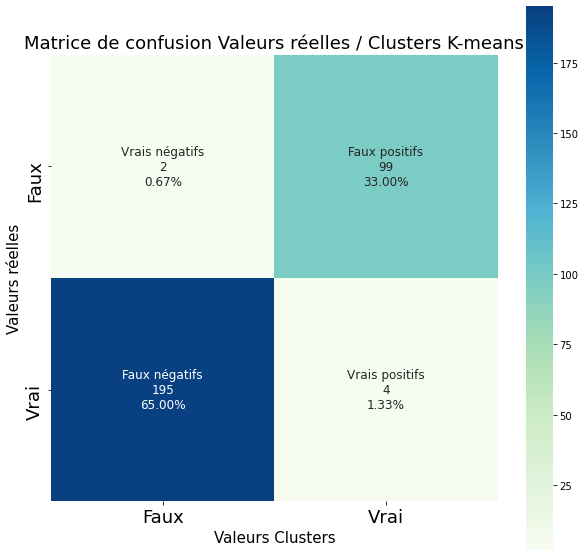

In [29]:
maKmeans = confusion_matrix(billetClusters['is_genuine'], billetClusters['clusters'])


names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
counts = ['{0:0.0f}'.format(value) for value in
                maKmeans.flatten()]
pourcentages = ['{0:.2%}'.format(value) for value in
                     maKmeans.flatten()/np.sum(maKmeans)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names,counts,pourcentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,10))
axes = sns.heatmap(maKmeans, square=True, annot=labels, annot_kws={"size": 12}, fmt='',
                   cmap=plt.cm.GnBu)

class_label = ['Faux', 'Vrai']
axes.set_xlabel('Valeurs Clusters', size = 15)
axes.set_ylabel('Valeurs réelles', size = 15)
axes.set_xticklabels(class_label, size=18)
axes.set_yticklabels(class_label, size=18)
axes.set_title('Matrice de confusion Valeurs réelles / Clusters K-means', size=18)

plt.show()

## Ou se trouve les  erreurs chez les K-means??

In [30]:
false_kmeans1 = pd.DataFrame(billetClusters['is_genuine'])
false_kmeans2 = pd.DataFrame(billetClusters['clusters'], index=y_test.index)
false_kmeans = pd.concat([false_kmeans1,false_kmeans2], axis=1)
erreur_kmeans = false_kmeans[false_kmeans['is_genuine'] != false_kmeans['clusters']].index
erreur_kmeans

Int64Index([ 224,  737,  984, 1164, 1060,  782, 1439, 1419, 1194,  490,
            ...
             146,    8,  867, 1116,  483,  726,  301,  213, 1313,  282],
           dtype='int64', length=294)

## KNN

In [31]:

param_grid = {'n_neighbors': np.arange(1,20),
             'metric':['euclidean', 'manhattan'], # parametre de mesure de distance entre 2 points
             'weights':['uniform', 'distance']}   # parametre qui peut être défini sur « uniform », où chaque voisin à l'intérieur de la limite porte le même poids ou « distance » où la décision sera orienté vers les points les plus proches.
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs = -1)
grid.fit(xtrain, ytrain)

knn = grid.best_estimator_

In [32]:
pred = knn.predict(xtest)
knn.score(xtest, ytest)

0.9833333333333333

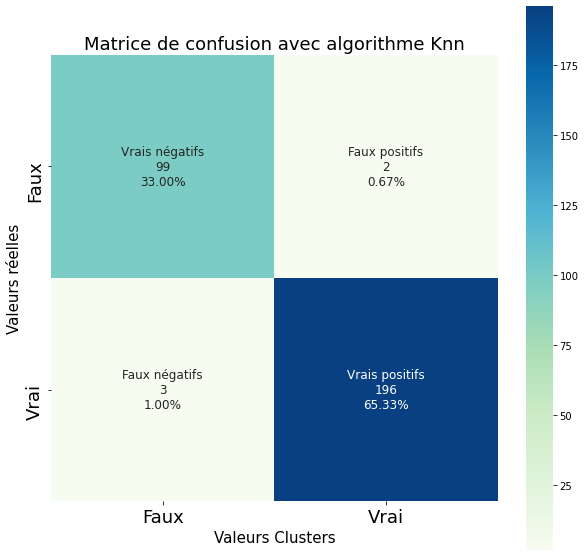

In [33]:
mak = confusion_matrix(ytest, pred)

names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
counts = ['{0:0.0f}'.format(value) for value in
                mak.flatten()]
pourcentages = ['{0:.2%}'.format(value) for value in
                     mak.flatten()/np.sum(mak)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names,counts,pourcentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,10))
axes = sns.heatmap(mak, square=True, annot=labels, annot_kws={"size": 12}, fmt='',
                   cmap=plt.cm.GnBu)

class_label = ['Faux', 'Vrai']
axes.set_xlabel('Valeurs Clusters', size = 15)
axes.set_ylabel('Valeurs réelles', size = 15)
axes.set_xticklabels(class_label, size=18)
axes.set_yticklabels(class_label, size=18)
axes.set_title('Matrice de confusion avec algorithme Knn', size=18)

plt.show()

## Ou sont les erreurs des KNN ??

In [34]:
false_knn1 = pd.DataFrame(pred, index=ytest.index)
false_knn1 = false_knn1.replace({True:1, False:0})
false_knn2 = pd.DataFrame(ytest)
false_knn2 = false_knn2.replace({True:1, False:0})
false_knn = pd.concat([false_knn1, false_knn2], axis=1)
erreur_knn = false_knn[false_knn['is_genuine'] != false_knn[0]].index
erreur_knn

Int64Index([728, 1104, 1482, 626, 946], dtype='int64')

## regression logistique

In [35]:
logit = LogisticRegression()


In [36]:
%timeit logit.fit(xtrain, ytrain)



3.9 ms ± 319 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
logit.fit(xtrain, ytrain)

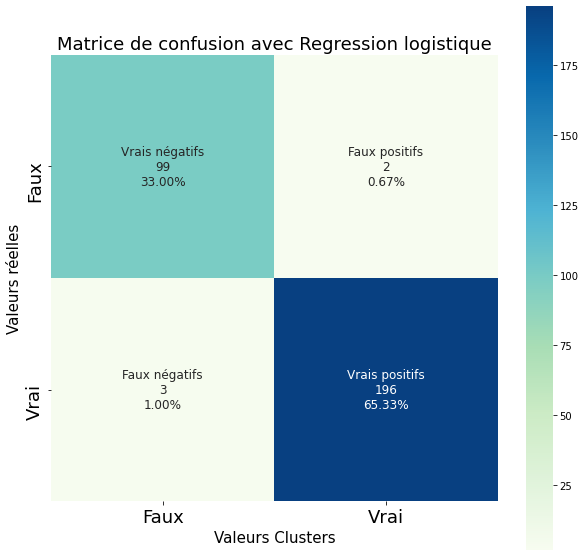

In [38]:
mat = confusion_matrix(ytest, y_pred)

names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
counts = ['{0:0.0f}'.format(value) for value in
                mat.flatten()]
pourcentages = ['{0:.2%}'.format(value) for value in
                     mat.flatten()/np.sum(mat)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names,counts,pourcentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,10))
axes = sns.heatmap(mat, square=True, annot=labels, annot_kws={"size": 12}, fmt='',
                   cmap=plt.cm.GnBu)

class_label = ['Faux', 'Vrai']
axes.set_xlabel('Valeurs Clusters', size = 15)
axes.set_ylabel('Valeurs réelles', size = 15)
axes.set_xticklabels(class_label, size=18)
axes.set_yticklabels(class_label, size=18)
axes.set_title('Matrice de confusion avec Regression logistique', size=18)

plt.show()

## Et maintenant les erreurs de la regression logistique !

In [39]:
false_reg1 = pd.DataFrame(y_pred, index=ytest.index)
false_reg1 = false_reg1.replace({True:1, False:0})
false_reg2 = pd.DataFrame(ytest)
false_reg2 = false_reg2.replace({True:1, False:0})
false_reg = pd.concat([false_reg1, false_reg2], axis=1)
erreur_reg = false_reg[false_reg['is_genuine'] != false_reg[0]].index
erreur_reg

Int64Index([728, 1104, 1482, 626, 946], dtype='int64')

## Comparaison des erreurs entre les 3 algorithmes

In [40]:
print(erreur_knn, 'sont les index erreurs des KNN')
print(erreur_reg, 'sont les index erreurs de la regression logistique')
print(erreur_kmeans, 'sont les index erreurs des Kmeans')

Int64Index([728, 1104, 1482, 626, 946], dtype='int64') sont les index erreurs des KNN
Int64Index([728, 1104, 1482, 626, 946], dtype='int64') sont les index erreurs de la regression logistique
Int64Index([ 224,  737,  984, 1164, 1060,  782, 1439, 1419, 1194,  490,
            ...
             146,    8,  867, 1116,  483,  726,  301,  213, 1313,  282],
           dtype='int64', length=294) sont les index erreurs des Kmeans


## choix de l'algorithme

Je choisi la regression logistique car : 

 - Cet algorithme fonctionne mieux sur les gros dataset( je suppose qu'il y aura beaucoup de billets à analyser)
 - La regression logistique est un modele parametrique qui suit des lois de probabilités normales.

# Fichier test

In [41]:
billetTest = pd.read_csv('billets_production.csv')

In [42]:
billetTest.head()

diagonal  height_left  height_right  margin_low  margin_up  length   id
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5

In [43]:
billetX= billetTest.drop(columns=['id'])

In [44]:
billetTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 408.0+ bytes


In [45]:
X_scaled_test = std_scale.fit_transform(billetX)

In [46]:
X_projected_test = Mypca.transform(X_scaled_test)


In [47]:
predTest = knn.predict(X_projected_test)
predTest

array([ True,  True,  True, False,  True])

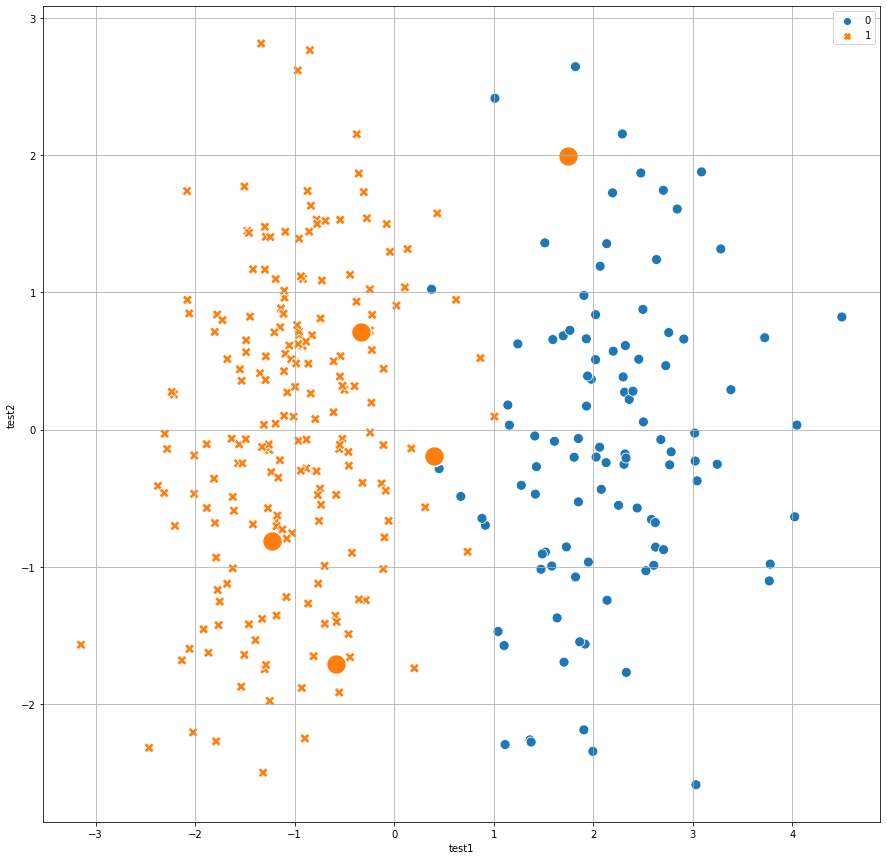

In [48]:
ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(data = billetClusters, x='test1', y='test2', s=100, style='is_genuine', hue='is_genuine')
sns.scatterplot(data = pd.DataFrame(X_projected_test, columns=['pca1', 'pca2']), x='pca1', y='pca2', s=400)
plt.grid()
plt.show()


In [49]:
y_pred = logit.predict_proba(X_projected_test)
y_pred = pd.DataFrame(y_pred)
y_pred = round(y_pred,2)*100
y_pred = y_pred.astype(str) + '%'
y_pred = pd.concat([billetTest.id, y_pred], axis=1)
y_pred = y_pred.rename(columns={0:'Faux billets', 1:'Vrais billets', 'id':'Prédictions'})
y_pred

Prédictions Faux billets Vrais billets
0         A_1         0.0%        100.0%
1         A_2        34.0%         66.0%
2         A_3         2.0%         98.0%
3         A_4        99.0%          1.0%
4         A_5         1.0%         99.0%

# Fonction Programme de detection

In [57]:
def detecteur():
        class color : 
            BOLD = '\033[01m'
            RED = '\033[91m'
            END = '\033[0m'
        # selection du csv
        fichier = pd.read_csv(str(input(color.BOLD + 'Comment s\'appelle votre fichier ?(avec l\'extention)' + color.END)))
        display(fichier.head(5))
        fichier.info()
        
        # selection de la colonne id
        Yn = str(input(color.BOLD + 'Y a t\'il une colonne identifiant ? [o/n]'))
        Yn = Yn.strip().lower()
        
        # condition
        if Yn == ('o'):
                drop = str(input(color.BOLD + 'Veuillez indiquer le nom de la colonne Identifiant :' + color.END))
                valeur = fichier.set_index(drop)
                
        elif Yn == ('n'):
                valeur=fichier
                
        else : print(color.RED + 'Répondez par o ou n !!' + color.END)

        # analyse
        predict = std_scale.fit_transform(valeur)
        predict = Mypca.transform(predict)
        predict = logit.predict_proba(predict)
        valeur = pd.DataFrame(predict, index=valeur.index)
        valeur = round(valeur,2)*100
        valeur = valeur.astype(str) + '%'
        valeur = valeur.rename(columns={0:'Faux billets', 1:'Vrais billets'})
        valeur.index.name = 'Prédictions'
        display(valeur)
        return valeur


In [58]:
df = detecteur()

Comment s'appelle votre fichier ?(avec l'extention)billets_production2.csv


diagonal  height_left  height_right  margin_low  margin_up  length   id
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 408.0+ bytes
Y a t'il une colonne identifiant ? [o/n]o
Veuillez indiquer le nom de la colonne Identifiant :id


Faux billets Vrais billets
Prédictions                           
A_1                 0.0%        100.0%
A_2                34.0%         66.0%
A_3                 2.0%         98.0%
A_4                99.0%          1.0%
A_5                 1.0%         99.0%

In [65]:
def detecteur2(path:str,drop:str)-> pd.DataFrame:
        fichier:pd.DataFrame = pd.read_csv(path)
        valeur = fichier.drop(columns = {drop})

        valeur = std_scale.fit_transform(valeur)
        valeur = Mypca.transform(valeur)
        valeur = logit.predict_proba(valeur)
        valeur = pd.DataFrame(valeur)
        valeur = round(valeur,2)*100
        valeur = valeur.astype(str) + '%'
        valeur = pd.concat([fichier[drop], valeur], axis=1)
        valeur = valeur.rename(columns={0:'Faux billets', 1:'Vrais billets', drop:'Prédictions'})
        return valeur

In [66]:
detecteur2("billets_production.csv",'id')

Prédictions Faux billets Vrais billets
0         A_1         0.0%        100.0%
1         A_2        34.0%         66.0%
2         A_3         2.0%         98.0%
3         A_4        99.0%          1.0%
4         A_5         1.0%         99.0%